In [798]:
import geopandas as gpd
import pandas as pd
import json
import maup
pd.set_option('display.max_columns', None)

Importing Data

In [799]:
precinct_boundaries = gpd.read_file('data/Utah/boundary_data/v2/tl_2020_49_vtd20.shp')
us_hor_results = pd.read_csv('data/US/2020-HOUSE-precinct-general.csv')
racial_demographics = pd.read_csv('data/Utah/demographic_data/DECENNIALPL2020.P2-Data.csv')
current_districting = gpd.read_file('data/Utah/current_districting/ut_cong_2021.shp')
display(precinct_boundaries)
#display(us_hor_results[us_hor_results['state_po'] == 'UT'].tail(50))
display(racial_demographics)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,49,023,CA0011,49023CA0011,P,Callaco 11,Callaco 11 Voting District,V2,G5240,S,4616136782,14768056,+39.7662242,-113.3230554,"POLYGON ((-114.04785 39.77940, -114.04784 39.7..."
1,49,025,BULL00,49025BULL00,P,Bullfrog,Bullfrog Voting District,V2,G5240,S,4592669887,303260980,+37.3841794,-111.3011673,"POLYGON ((-112.05125 37.53414, -112.05125 37.5..."
2,49,025,BIGW00,49025BIGW00,P,Big Water,Big Water Voting District,V2,G5240,S,15520255,0,+37.0728738,-111.6607624,"POLYGON ((-111.68790 37.09221, -111.66998 37.0..."
3,49,025,CM0000,49025CM0000,P,Cedar Mountain,Cedar Mountain Voting District,V2,G5240,S,734845645,1305557,+37.4419593,-112.7317083,"POLYGON ((-112.90137 37.37623, -112.90136 37.3..."
4,49,051,0044E0,490510044E0,P,Wasatch 44 East,Wasatch 44 East Voting District,V2,G5240,S,49974896,0,+40.3776544,-111.3824073,"POLYGON ((-111.47847 40.41267, -111.47834 40.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,49,023,LEV06I,49023LEV06I,P,Levan 6 I,Levan 6 I Voting District,V2,G5240,S,2097675,0,+39.5561401,-111.8606120,"POLYGON ((-111.86963 39.56232, -111.86955 39.5..."
2741,49,023,MONA5E,49023MONA5E,P,Mona 5 E,Mona 5 E Voting District,V2,G5240,S,92173084,1973,+39.8506738,-111.7940341,"POLYGON ((-111.83840 39.79457, -111.83830 39.7..."
2742,49,023,RR13II,49023RR13II,P,Ricky Ridge 13 I,Ricky Ridge 13 I Voting District,V2,G5240,S,4438129,0,+39.9197470,-111.8257475,"POLYGON ((-111.83909 39.91831, -111.83286 39.9..."
2743,49,023,MONA5I,49023MONA5I,P,Mona 5 I,Mona 5 I Voting District,V2,G5240,S,6562502,78864,+39.8131259,-111.8515767,"POLYGON ((-111.86705 39.82466, -111.86511 39.8..."


,GEO_ID,NAME,P2_001N,P2_001NA,P2_002N,P2_002NA,P2_003N,P2_003NA,P2_004N,P2_004NA,P2_005N,P2_005NA,P2_006N,P2_006NA,P2_007N,P2_007NA,P2_008N,P2_008NA,P2_009N,P2_009NA,P2_010N,P2_010NA,P2_011N,P2_011NA,P2_012N,P2_012NA,P2_013N,P2_013NA,P2_014N,P2_014NA,P2_015N,P2_015NA,P2_016N,P2_016NA,P2_017N,P2_017NA,P2_018N,P2_018NA,P2_019N,P2_019NA,P2_020N,P2_020NA,P2_021N,P2_021NA,P2_022N,P2_022NA,P2_023N,P2_023NA,P2_024N,P2_024NA,P2_025N,P2_025NA,P2_026N,P2_026NA,P2_027N,P2_027NA,P2_028N,P2_028NA,P2_029N,P2_029NA,P2_030N,P2_030NA,P2_031N,P2_031NA,P2_032N,P2_032NA,P2_033N,P2_033NA,P2_034N,P2_034NA,P2_035N,P2_035NA,P2_036N,P2_036NA,P2_037N,P2_037NA,P2_038N,P2_038NA,P2_039N,P2_039NA,P2_040N,P2_040NA,P2_041N,P2_041NA,P2_042N,P2_042NA,P2_043N,P2_043NA,P2_044N,P2_044NA,P2_045N,P2_045NA,P2_046N,P2_046NA,P2_047N,P2_047NA,P2_048N,P2_048NA,P2_049N,P2_049NA,P2_050N,P2_050NA,P2_051N,P2_051NA,P2_052N,P2_052NA,P2_053N,P2_053NA,P2_054N,P2_054NA,P2_055N,P2_055NA,P2_056N,P2_056NA,P2_057N,P2_057NA,P2_058N,P2_058NA,P2_059N,P2_059NA,P2_060N,P2_060NA,P2_061N,P2_061NA,P2_062N,P2_062NA,P2_063N,P2_063NA,P2_064N,P2_064NA,P2_065N,P2_065NA,P2_066N,P2_066NA,P2_067N,P2_067NA,P2_068N,P2_068NA,P2_069N,P2_069NA,P2_070N,P2_070NA,P2_071N,P2_071NA,P2_072N,P2_072NA,P2_073N,P2_073NA,Unnamed: 148
0,Geography,Geographic Area Name,!!Total:,Annotation of !!Total:,!!Total:!!Hispanic or Latino,Annotation of !!Total:!!Hispanic or Latino,!!Total:!!Not Hispanic or Latino:,Annotation of !!Total:!!Not Hispanic or Latino:,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !

Boundary Data Preprocessing

['BO0040',
 'LAKE00',
 'LAKE00',
 'LAKE00',
 'KA0150',
 'CE0120',
 'CE004I',
 'SF007U',
 'SP007U',
 'LAKE00',
 'LAKE00',
 'LAKE00',
 'MIL025',
 'MIL025',
 'PA0008',
 'PA0008',
 'PA0007',
 'PA0007',
 'UL001U',
 'WAN17E',
 'WEB21N',
 'WEB21W',
 'SP0005',
 'SP0005',
 'SP0001',
 'SP0001',
 'SP0003',
 'SP0003',
 'SP0006',
 'SP0006',
 'SP0002',
 'SP0002',
 'AF0013',
 'PA0007',
 'PA0007',
 'SP0017',
 'SP0002',
 'SP0002',
 'PA0008',
 'PA0008',
 'SP0013',
 'SP0001',
 'SP0001',
 'AF0014',
 'SP0005',
 'SP0005',
 'SP0008',
 'SP0003',
 'SP0003',
 'SP0006',
 'SP0006',
 'MIL026',
 'WVC054',
 'SLC106',
 'RIV001',
 'RIV001',
 'TAY001',
 'TAY001',
 'SLC078',
 'SLC055',
 'SLC025',
 'SLC131',
 'MIL027',
 'WVC056',
 'KRN008',
 'SLC021',
 'TAY002',
 'TAY002',
 'RIV005',
 'RIV005',
 'SLC020',
 'SLC054',
 'MIL023',
 'MIL025',
 'MIL025',
 'RIV003',
 'RIV003',
 'RIV002',
 'RIV002',
 'WCR002',
 'WCR002',
 'SLC128',
 'SLC062',
 'SLC023',
 'SLC155',
 'SLC132',
 'SLC167',
 'MID010',
 'SLC117',
 'WBN004',
 'MID003',

<AxesSubplot: >

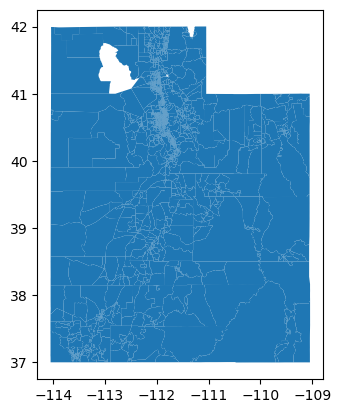

In [800]:
precinct_boundaries['precinct'] = precinct_boundaries['VTDST20']
precinct_boundaries['pname'] = precinct_boundaries['NAME20']
#precinct_boundaries['geometry'] = maup.close_gaps(precinct_boundaries['geometry'])
#precinct_boundaries['geometry'] = maup.resolve_overlaps(precinct_boundaries['geometry'])
precinct_boundaries['geometry'] = precinct_boundaries['geometry'].to_crs("EPSG:4326")
final_columns = ['precinct', 'pname', 'geometry']
precinct_boundaries = precinct_boundaries[precinct_boundaries.columns.intersection(final_columns)]
#display(precinct_boundaries.head())
#display(precinct_boundaries[precinct_boundaries['precinct'] == 'BEV1I-'])
precinct_boundaries = precinct_boundaries[precinct_boundaries['precinct']!= 'LAKE00']
with open('data/Utah/bad_prec.json', 'r', encoding='utf-8') as file:
    bad_prec = json.load(file)
display(bad_prec)
#precinct_boundaries = precinct_boundaries[~precinct_boundaries['precinct'].isin(bad_prec)]
#precinct_boundaries['geometry'] = maup.close_gaps(precinct_boundaries['geometry'])
#precinct_boundaries['geometry'] = maup.resolve_overlaps(precinct_boundaries['geometry'])
display(precinct_boundaries.plot())

Voting Data preprocessing

In [801]:
us_hor_results.drop(["office",'party_detailed','mode','county_name','county_fips','jurisdiction_name','jurisdiction_fips','candidate','district','magnitude','dataverse','year','stage','state','special','writein','state_fips','state_cen','state_ic','date','readme_check'], axis = 1, inplace=True)
vote = us_hor_results[us_hor_results['state_po'] == 'UT'].copy()
vote.drop(["state_po"], axis = 1, inplace=True)
conv = [
    ('(UNINCORPORATED) ', ''),
    ("RIVERDALE ", "RIV"),
    ("ROY ", "ROY"),
    ("SOUTH OGDEN ", "SOG"),
    ("WASHINGTON TERRACE ", "WAT"),
    ("WEST HAVEN ", "WHV"),
    ("SG", "SG00"),
    ('OGDEN ','OGD'),
    ('PLEASANT VIEW ','PLV')
]
for long, contra in conv:
    vote['precinct'] = vote['precinct'].str.replace(long, contra)
    
display(vote)

C:\Users\samcs\AppData\Local\Temp\ipykernel_117776\1154261856.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  vote['precinct'] = vote['precinct'].str.replace(long, contra)


,precinct,party_simplified,votes
710784,(UNINCORPORATED) OGDVALLEY 001,DEMOCRAT,0
710785,(UNINCORPORATED) OGDVALLEY 001,DEMOCRAT,0
710786,(UNINCORPORATED) OGDVALLEY 001,DEMOCRAT,0
710787,(UNINCORPORATED) OGDVALLEY 001,DEMOCRAT,277
710788,(UNINCORPORATED) OGDVALLEY 001,REPUBLICAN,0
...,...,...,...
743852,WVC079,OTHER,1
743853,WVC079,OTHER,8
743854,WVC079,REPUBLICAN,11
743855,WVC079,REPUBLICAN,7


Demographic Data Cleaning

In [802]:
racial_demographics.drop([0], axis = 0, inplace=True) #drop Header row
racial_demographics['precinct'] = racial_demographics['GEO_ID'].str[14:]
racial_demographics['totalPop'] = racial_demographics['P2_001N'].astype(int)
racial_demographics['africanAmericanPop'] = racial_demographics['P2_006N'].astype(int)
racial_demographics['caucasianPop'] = racial_demographics['P2_005N'].astype(int)
racial_demographics['latinoPop'] = racial_demographics['P2_002N'].astype(int)
racial_demographics['asainPop'] = racial_demographics['P2_008N'].astype(int)
racial_demographics['nativeAmericanPop'] = racial_demographics['P2_007N'].astype(int)
final_columns = ['county','precinct', 'totalPop','africanAmericanPop','caucasianPop','latinoPop','asainPop', 'nativeAmericanPop']
racial_demographics = racial_demographics[racial_demographics.columns.intersection(final_columns)]
display(racial_demographics)

,precinct,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
1,BEA4UN,7,0,1,1,0,4
2,BEV1I-,1457,0,1236,167,14,10
3,BEV2I-,1732,23,1304,328,8,26
4,BEV3I-,403,0,363,29,1,1
5,BEV3UE,16,0,10,3,0,0
...,...,...,...,...,...,...,...
2741,WHV007,1839,23,1484,215,21,10
2742,WHV008,1257,37,827,281,24,16
2743,WNO002,0,0,0,0,0,0
2744,WNO03E,0,0,0,0,0,0


Combining Data Functions

In [803]:
def total_votes(precinct, party, source, pure_name):
    if (precinct == 'na'):
        return 0
    #precintdf = source[(source['precinct'].str.contains(precinct)) & (source['party'] == party)]
    precinctdf = get_precinct(precinct, source)
    if(type(pure_name) is str):
        backup = get_precinct(pure_name, source)
        precinctdf = pd.concat([precinctdf, backup])
    precinctdf = precinctdf[precinctdf['party_simplified'] == party]
    return precinctdf['votes'].sum()

def get_precinct(precinct, source):
    precinctdf = source[source['precinct'].str.contains(precinct, case=False)]
    return precinctdf

Combining Data

<AxesSubplot: >

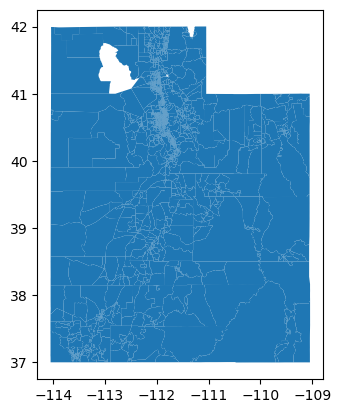

In [804]:
state = precinct_boundaries
display(state.plot())

In [805]:
display(state.iloc[0])
display(state.iloc[0].pname)
display(state)
#state['demVotes'] = state.apply(lambda x: total_votes(x.precinct, 'DEMOCRAT', vote, x.pname), axis = 1)
#state['repVotes'] = state.apply(lambda x: total_votes(x.precinct, 'REPUBLICAN', vote, x.name), axis = 1)
#state['totalVotes'] = state['demVotes'] + state['repVotes']
state['demVotes'] = 0
state['repVotes'] = 0
state['totalVotes'] = 1
display(state)

geometry    POLYGON ((-114.04785484076537 39.7794036771971...
precinct                                               CA0011
pname                                              Callaco 11
Name: 0, dtype: object

'Callaco 11'

,geometry,precinct,pname
0,"POLYGON ((-114.04785 39.77940, -114.04784 39.7...",CA0011,Callaco 11
1,"POLYGON ((-112.05125 37.53415, -112.05125 37.5...",BULL00,Bullfrog
2,"POLYGON ((-111.68790 37.09221, -111.66998 37.0...",BIGW00,Big Water
3,"POLYGON ((-112.90137 37.37623, -112.90136 37.3...",CM0000,Cedar Mountain
4,"POLYGON ((-111.47847 40.41267, -111.47834 40.4...",0044E0,Wasatch 44 East
...,...,...,...
2740,"POLYGON ((-111.86963 39.56233, -111.86955 39.5...",LEV06I,Levan 6 I
2741,"POLYGON ((-111.83840 39.79457, -111.83830 39.7...",MONA5E,Mona 5 E
2742,"POLYGON ((-111.83909 39.91832, -111.83286 39.9...",RR13II,Ricky Ridge 13 I
2743,"POLYGON ((-111.86705 39.82467, -111.86511 39.8...",MONA5I,Mona 5 I


,geometry,precinct,pname,demVotes,repVotes,totalVotes
0,"POLYGON ((-114.04785 39.77940, -114.04784 39.7...",CA0011,Callaco 11,0,0,1
1,"POLYGON ((-112.05125 37.53415, -112.05125 37.5...",BULL00,Bullfrog,0,0,1
2,"POLYGON ((-111.68790 37.09221, -111.66998 37.0...",BIGW00,Big Water,0,0,1
3,"POLYGON ((-112.90137 37.37623, -112.90136 37.3...",CM0000,Cedar Mountain,0,0,1
4,"POLYGON ((-111.47847 40.41267, -111.47834 40.4...",0044E0,Wasatch 44 East,0,0,1
...,...,...,...,...,...,...
2740,"POLYGON ((-111.86963 39.56233, -111.86955 39.5...",LEV06I,Levan 6 I,0,0,1
2741,"POLYGON ((-111.83840 39.79457, -111.83830 39.7...",MONA5E,Mona 5 E,0,0,1
2742,"POLYGON ((-111.83909 39.91832, -111.83286 39.9...",RR13II,Ricky Ridge 13 I,0,0,1
2743,"POLYGON ((-111.86705 39.82467, -111.86511 39.8...",MONA5I,Mona 5 I,0,0,1


In [806]:
state = state.merge(racial_demographics, left_on = 'precinct', right_on = 'precinct', how = 'left')
state = state.fillna(0)
state['totalPop'] = state['totalPop'].astype(int)
state['africanAmericanPop'] = state['africanAmericanPop'].astype(int)
state['caucasianPop'] = state['caucasianPop'].astype(int)
state['latinoPop'] = state['latinoPop'].astype(int)
state['asainPop'] = state['asainPop'].astype(int)
state['nativeAmericanPop'] = state['nativeAmericanPop'].astype(int)
display(state.head())

,geometry,precinct,pname,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
0,"POLYGON ((-114.04785 39.77940, -114.04784 39.7...",CA0011,Callaco 11,0,0,1,136,0,75,5,2,52
1,"POLYGON ((-112.05125 37.53415, -112.05125 37.5...",BULL00,Bullfrog,0,0,1,84,0,79,0,0,5
2,"POLYGON ((-111.68790 37.09221, -111.66998 37.0...",BIGW00,Big Water,0,0,1,449,3,365,30,5,30
3,"POLYGON ((-112.90137 37.37623, -112.90136 37.3...",CM0000,Cedar Mountain,0,0,1,411,5,373,13,4,11
4,"POLYGON ((-111.47847 40.41267, -111.47834 40.4...",0044E0,Wasatch 44 East,0,0,1,241,0,240,1,0,0


In [807]:
display(state['totalVotes'].value_counts())
display(state[state['totalVotes'] == 0])

1    2774
Name: totalVotes, dtype: int64

,geometry,precinct,pname,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop


Error Analysis

In [808]:
#Population Error Checking
total_pop_calc = state['totalPop'].sum()
total_pop_raw = racial_demographics['totalPop'].sum()
pop_error = (total_pop_calc - total_pop_raw)/total_pop_raw *100
display('Total Population Calculated: '+str(total_pop_calc))
display('Total Population Raw: '+str(total_pop_raw))
display('Percent Error: %'+str(pop_error))
display(state['precinct'][state['totalPop'] == 0])

'Total Population Calculated: 3324680'

'Total Population Raw: 3271616'

'Percent Error: %1.6219507423854145'

13      0044FS
16      WCUFW0
67      LA01UA
156     WX006U
169     0CE00U
         ...  
2719    COH29N
2720    WA029I
2731    CB022S
2738    ELS05W
2764    NEP3UW
Name: precinct, Length: 141, dtype: object

In [809]:
total_vote_calc = state['totalVotes'].sum()
total_vote_raw = vote['votes'][vote['party_simplified'] == 'DEMOCRAT'].sum() + vote['votes'][vote['party_simplified'] == 'REPUBLICAN'].sum()
vote_error = (total_vote_calc - total_vote_raw)/total_vote_raw *100
display('Total Vote Calculated: '+str(total_vote_calc))
display('Total Vote Raw: '+str(total_vote_raw))   
display('Percent Error: %'+str(vote_error))
display(state['precinct'][state['totalVotes'] == 0])

'Total Vote Calculated: 2774'

'Total Vote Raw: 1379292'

'Percent Error: %-99.79888232513491'

Series([], Name: precinct, dtype: object)

In [810]:
code = 'brig'
display(precinct_boundaries[precinct_boundaries['precinct'].str.contains(code, case=False)])
display(precinct_boundaries[precinct_boundaries['pname'].str.contains(code,  case=False)])
display(vote[vote['precinct'].str.contains(code,  case=False)])
display(state[state['precinct'].str.contains(code, case=False)])
display(state[state['pname'].str.contains(code, case=False)])

,geometry,precinct,pname,demVotes,repVotes,totalVotes


,geometry,precinct,pname,demVotes,repVotes,totalVotes
544,"POLYGON ((-112.07796 41.59902, -112.07339 41.5...",BC00UN,Brigham City U N,0,0,1
624,"POLYGON ((-111.66345 40.65026, -111.66244 40.6...",BRT00I,Brighton I,0,0,1
695,"POLYGON ((-112.06572 41.50985, -112.06491 41.5...",BC0005,Brigham City 5,0,0,1
696,"POLYGON ((-112.08000 41.53825, -112.07962 41.5...",BC0006,Brigham City 6,0,0,1
697,"POLYGON ((-112.11142 41.50395, -112.11095 41.5...",BC0004,Brigham City 4,0,0,1
698,"POLYGON ((-112.02337 41.52495, -112.02331 41.5...",BC0007,Brigham City 7,0,0,1
699,"POLYGON ((-112.01567 41.51326, -112.01566 41.5...",BC0008,Brigham City 8,0,0,1
700,"POLYGON ((-112.01101 41.51294, -112.01100 41.5...",BC0009,Brigham City 9,0,0,1
701,"POLYGON ((-112.05923 41.50257, -112.05767 41.5...",BC0002,Brigham City 2,0,0,1
702,"POLYGON ((-112.01597 41.49882, -112.01597 41.4...",BC0013,Brigham City 13,0,0,1


,precinct,party_simplified,votes
711448,BRIGHAM CITY 1,DEMOCRAT,0
711449,BRIGHAM CITY 1,DEMOCRAT,0
711450,BRIGHAM CITY 1,DEMOCRAT,0
711451,BRIGHAM CITY 1,DEMOCRAT,189
711452,BRIGHAM CITY 1,REPUBLICAN,0
...,...,...,...
711571,BRIGHAM CITY NORTH,DEMOCRAT,42
711572,BRIGHAM CITY NORTH,REPUBLICAN,0
711573,BRIGHAM CITY NORTH,REPUBLICAN,0
711574,BRIGHAM CITY NORTH,REPUBLICAN,0


,geometry,precinct,pname,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop


,geometry,precinct,pname,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
543,"POLYGON ((-112.07796 41.59902, -112.07339 41.5...",BC00UN,Brigham City U N,0,0,1,426,0,397,18,1,0
623,"POLYGON ((-111.66345 40.65026, -111.66244 40.6...",BRT00I,Brighton I,0,0,1,432,0,388,18,5,3
694,"POLYGON ((-112.06572 41.50985, -112.06491 41.5...",BC0005,Brigham City 5,0,0,1,998,0,819,129,6,9
695,"POLYGON ((-112.08000 41.53825, -112.07962 41.5...",BC0006,Brigham City 6,0,0,1,1563,8,1361,130,11,18
696,"POLYGON ((-112.11142 41.50395, -112.11095 41.5...",BC0004,Brigham City 4,0,0,1,1392,13,1096,198,16,31
697,"POLYGON ((-112.02337 41.52495, -112.02331 41.5...",BC0007,Brigham City 7,0,0,1,1583,7,1295,214,1,13
698,"POLYGON ((-112.01567 41.51326, -112.01566 41.5...",BC0008,Brigham City 8,0,0,1,807,2,659,95,4,9
699,"POLYGON ((-112.01101 41.51294, -112.01100 41.5...",BC0009,Brigham City 9,0,0,1,777,0,634,114,2,8
700,"POLYGON ((-112.05923 41.50257, -112.05767 41.5...",BC0002,Brigham City 2,0,0,1,1508,2,1179,260,6,10
701,"POLYGON ((-112.01597 41.49882, -112.01597 41.4...",BC0013,Brigham City 13,0,0,1,1178,5,932,172,2,8


Import  Current Districting

,DISTRICTNO,TAPERSONS,VAPERSONS,geometry
0,1.0,817904.0,584771.0,"POLYGON ((-112.49352 41.07689, -112.50080 41.0..."
1,2.0,817904.0,594250.0,"POLYGON ((-114.05282 37.53103, -114.05283 37.5..."
2,3.0,817904.0,592597.0,"POLYGON ((-111.91429 40.45920, -111.91427 40.4..."
3,4.0,817904.0,552433.0,"POLYGON ((-112.35344 39.55526, -112.35163 39.5..."


<AxesSubplot: >

<AxesSubplot: >

c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometrie

,geometry,precinct,pname,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,district
0,"POLYGON ((-114.04785 39.77940, -114.04784 39.7...",CA0011,Callaco 11,0,0,1,136,0,75,5,2,52,2
1,"POLYGON ((-112.05125 37.53415, -112.05125 37.5...",BULL00,Bullfrog,0,0,1,84,0,79,0,0,5,2
2,"POLYGON ((-111.68790 37.09221, -111.66998 37.0...",BIGW00,Big Water,0,0,1,449,3,365,30,5,30,2
3,"POLYGON ((-112.90137 37.37623, -112.90136 37.3...",CM0000,Cedar Mountain,0,0,1,411,5,373,13,4,11,2
4,"POLYGON ((-111.47847 40.41267, -111.47834 40.4...",0044E0,Wasatch 44 East,0,0,1,241,0,240,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,"POLYGON ((-111.86963 39.56233, -111.86955 39.5...",LEV06I,Levan 6 I,0,0,1,862,0,801,46,0,0,4
2770,"POLYGON ((-111.83840 39.79457, -111.83830 39.7...",MONA5E,Mona 5 E,0,0,1,21,0,18,0,0,0,4
2771,"POLYGON ((-111.83909 39.91832, -111.83286 39.9...",RR13II,Ricky Ridge 13 I,0,0,1,848,0,811,22,2,1,4
2772,"POLYGON ((-111.86705 39.82467, -111.86511 39.8...",MONA5I,Mona 5 I,0,0,1,1746,1,1642,51,1,3,4


,geometry,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
district,,,,,,,,,,
1,"MULTIPOLYGON (((-112.25078 41.08859, -112.3069...",0,0,686,788926,8645,621538,104009,16423,3779
2,"MULTIPOLYGON (((-113.33443 36.99998, -113.3346...",0,0,751,785422,12069,552946,149238,20262,6892
3,"POLYGON ((-111.85699 40.40618, -111.85932 40.4...",0,0,725,809908,5642,630074,99933,18648,13616
4,"POLYGON ((-112.08256 39.32971, -112.08277 39.3...",0,0,509,781376,9364,579705,125464,20187,3817


<AxesSubplot: >

<AxesSubplot: >

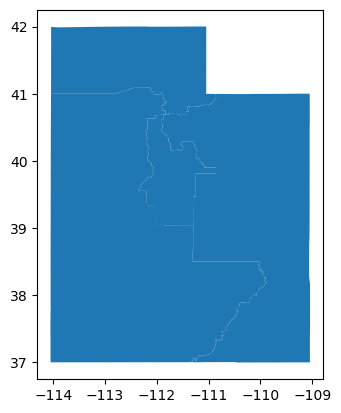

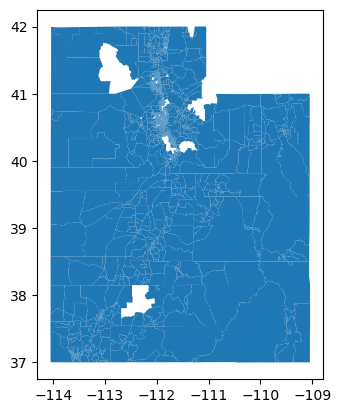

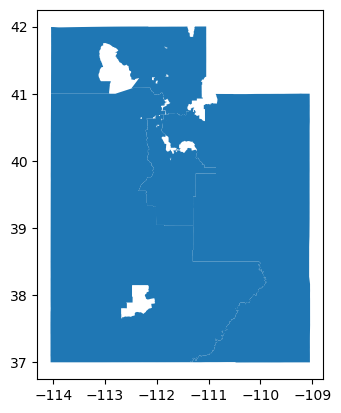

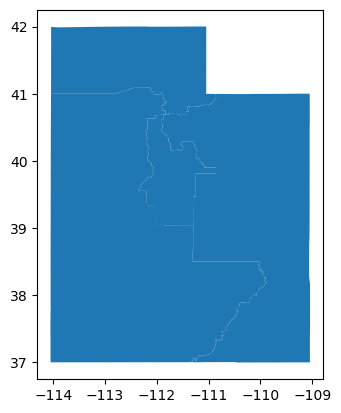

In [811]:
current_districting['geometry'] = current_districting['geometry'].to_crs("EPSG:4326")
#current_districting['geometry'] = maup.close_gaps(current_districting['geometry'])
#current_districting['geometry'] = maup.resolve_overlaps(current_districting['geometry'])
#state['geometry'] = state['geometry'].to_crs(3566)
#state['geometry'] = maup.close_gaps(state['geometry'])
#state['geometry'] = maup.resolve_overlaps(state['geometry'])
def assign_district(precinct_geo):
    inter = current_districting[current_districting.intersects(precinct_geo)]
    inter = current_districting[current_districting.overlay(precinct_geo)]
    #display(inter)
                                
    return int(inter['DISTRICTNO'].min())

not_state = state[state['precinct'].isin(bad_prec)]
state = state[~state['precinct'].isin(bad_prec)]



    
display(current_districting)
display(current_districting.plot())
display(state.plot())
#display(state.index.is_unique)
#display(current_districting.index.is_unique)

def district_wrap(precinct):
    target = state[state['precinct'] == precinct]
    try:
        dist = maup.assign(target, current_districting)
    except Exception:
        display('Error')
        return -1
    return dist.min()

state['district'] = maup.assign(state, current_districting)
state['district'] = state['district'] + 1
#state['district'] = state['geometry'].apply(assign_district)
#state['district'] = state['precinct'].apply(district_wrap)
display(state)
#display(state['district'].unique())
dist = state.dissolve(by = 'district', aggfunc = 'sum')
display(dist)
display(dist.plot())
display(current_districting.plot())

In [812]:
bad_dists_list = state[state['district'] == -1].index.to_list()
bad_dists = state[state['district'] == -1]['precinct'].to_list()
#with open('data/Utah/bad_prec.json', 'w', encoding='utf-8') as file:
#    json.dump(bad_dists, file, ensure_ascii=False, indent=4)

<AxesSubplot: >

<AxesSubplot: >

,geometry,precinct,pname,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,district
85,"POLYGON ((-111.86312 40.90749, -111.86296 40.9...",BO0040,Bountiful 4 U,0,0,1,3,0,0,3,0,0,-1
219,"POLYGON ((-111.93241 41.00856, -111.93209 41.0...",KA0150,Kaysville 15,0,0,1,1246,1,1096,93,15,0,-1
334,"POLYGON ((-111.87897 40.92757, -111.87897 40.9...",CE0120,Centerville 12,0,0,1,1229,12,1026,92,25,3,-1
335,"POLYGON ((-111.87954 40.93975, -111.87932 40.9...",CE004I,Centerville 4 I,0,0,1,1124,0,1031,46,12,0,-1
580,"POLYGON ((-111.74838 40.16700, -111.74820 40.1...",SF007U,Spanish Fork 7 U,0,0,1,505,0,480,12,1,0,-1
752,"POLYGON ((-111.85254 41.70025, -111.85245 41.7...",MIL025,Millville 25,0,0,1,2168,0,1962,130,16,6,-1
753,"POLYGON ((-111.85254 41.70025, -111.85245 41.7...",MIL025,Millville 25,0,0,1,1210,6,1063,62,26,8,-1
988,"POLYGON ((-111.91138 40.33901, -111.91136 40.3...",UL001U,Utah Lake 1 U,0,0,1,4,0,3,1,0,0,-1
1190,"POLYGON ((-111.40982 40.79375, -111.40982 40.7...",WAN17E,Wanship 17 E,0,0,1,269,0,250,11,1,0,-1
1193,"POLYGON ((-111.14897 41.17956, -111.14895 41.1...",WEB21N,Weber Canyon 21 N,0,0,1,17,0,7,7,0,0,-1


<AxesSubplot: >

<AxesSubplot: >

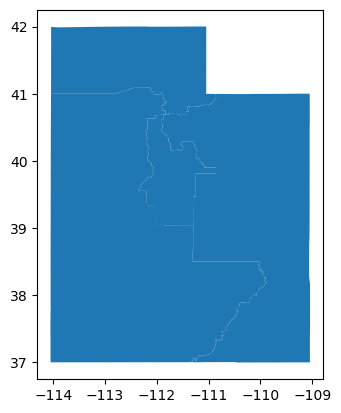

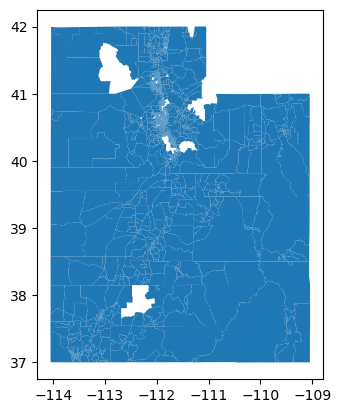

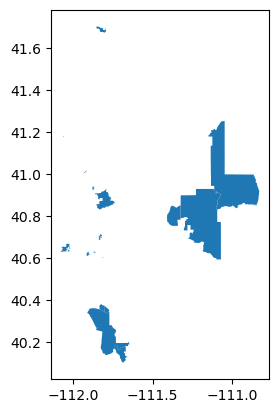

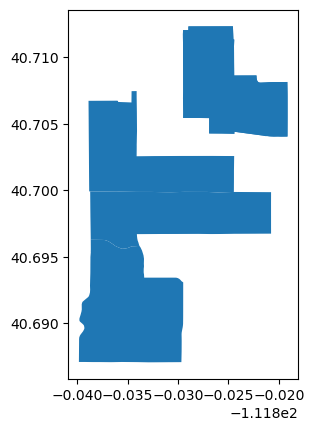

In [830]:

not_state['district'] = -1
not_state.loc[not_state['pname'].str.contains("Riverton"), 'district'] = 4
not_state.loc[not_state['precinct'].str.contains("SP"), 'district'] = 4
not_state.loc[not_state['precinct'].str.contains("SLC"), 'district'] = 1
not_state.loc[not_state['precinct'].str.contains("PA"), 'district'] = 2
not_state.loc[not_state['pname'].str.contains("Riverdale"), 'district'] = 1
not_state.loc[not_state['pname'].str.contains("Taylorsville"), 'district'] = 4
not_state.loc[not_state['pname'].str.contains("Taylor / West"), 'district'] = 1
display(current_districting.plot())
display(state.plot())
display(not_state[not_state['district'] == -1])
display(not_state[not_state['district'] == -1].plot())
#display(not_state[not_state['precinct'].str.contains("MIL")].plot())

display(not_state[not_state['pname'].str.contains("Millcreek")].plot())

Exporting State Data

In [814]:
state.to_file('data/Utah/utahGeo.geojson', driver='GeoJSON', index = True)
noGeo = pd.DataFrame(state.drop(columns='geometry'))
noGeo.to_json('data/Utah/utah.json', orient = 'index', compression = 'infer', index = True, indent = 4)

Computing Adjacency Graph Functions

In [815]:
def generate_adj(precinct, state):
    return 0

def addEdge(edges, index1, index2):
    if(index1 < index2):
        edges.add((int(index1),int(index2)))
    if(index1 > index2):
        edges.add((int(index2),int(index1)))

Computing Adjacency Graph

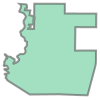

array([ 58, 128, 324, 329, 330], dtype=int64)

{(59, 729),
 (1917, 1921),
 (1468, 2583),
 (1137, 2712),
 (975, 2650),
 (586, 623),
 (1059, 1072),
 (1883, 2273),
 (1817, 1919),
 (1797, 1940),
 (1835, 2232),
 (1351, 1365),
 (86, 2673),
 (1853, 2286),
 (583, 1493),
 (349, 1326),
 (1784, 2415),
 (2485, 2499),
 (1328, 1354),
 (10, 813),
 (192, 332),
 (2432, 2572),
 (1672, 2066),
 (952, 959),
 (1344, 1483),
 (1295, 1298),
 (734, 736),
 (1467, 1553),
 (901, 913),
 (618, 790),
 (575, 2140),
 (1815, 2236),
 (1263, 1265),
 (1854, 1935),
 (1307, 1308),
 (809, 1031),
 (1342, 1494),
 (1586, 2120),
 (2140, 2706),
 (1772, 2310),
 (2281, 2416),
 (949, 2731),
 (1107, 1139),
 (1912, 2061),
 (272, 274),
 (1239, 1258),
 (2156, 2421),
 (1082, 1311),
 (1469, 1491),
 (2271, 2344),
 (275, 2679),
 (657, 2744),
 (1342, 1386),
 (1424, 1425),
 (2009, 2115),
 (2751, 2752),
 (734, 749),
 (1121, 1158),
 (866, 868),
 (217, 2674),
 (1033, 1045),
 (2311, 2416),
 (1937, 1946),
 (361, 652),
 (1666, 2126),
 (1910, 2257),
 (22, 139),
 (1935, 2021),
 (508, 527),
 (1745,

7959

In [816]:
edges = set()
testi = 57
display(state['geometry'][testi])
touch = state['geometry'].touches(state['geometry'][testi])
statesubset = state[touch]
display(statesubset.index.values)

for i in state.index:
    touch = state['geometry'].touches(state['geometry'][i])
    statesubset = state[touch]
    for j in statesubset.index.values:
        addEdge(edges, i, j)

display(edges)
display(len(edges))

Edge Spot Check

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

IndexError: positional indexers are out-of-bounds

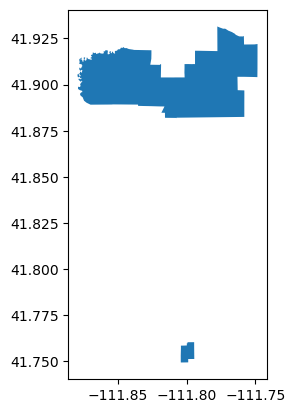

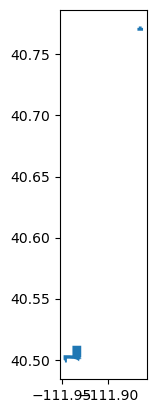

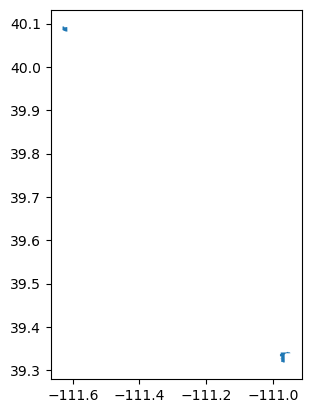

In [833]:
edge_index = 10
for edge in edges:
    display(state.iloc[list(edge)].plot())
    edge_index = edge_index + 1
    if(edge_index > 15):
        break

Edge Error Checking

In [834]:
missing_index = set()
found = False
for i in state.index:
    found = False
    for j in edges:
        if(i in j):
            found = True
            break
    if(not found):
        missing_index.add(i)
display(len(missing_index))
display(missing_index)
for precinct_index in missing_index:
    display(state.iloc[[precinct_index]])
    display(state.iloc[[precinct_index]].plot())

0

set()

Exporting Adjacency Graph Edges

In [835]:
edgeList = list(edges)
display(edgeList)
display(type(edgeList[0]))
display(type(edgeList[0][0]))
with open('data/Utah/utahEdges.json', 'w', encoding='utf-8') as file:
    json.dump(edgeList, file, ensure_ascii=False, indent=4)

[(59, 729),
 (1917, 1921),
 (1468, 2583),
 (1137, 2712),
 (975, 2650),
 (586, 623),
 (1059, 1072),
 (1883, 2273),
 (1817, 1919),
 (1797, 1940),
 (1835, 2232),
 (1351, 1365),
 (86, 2673),
 (1853, 2286),
 (583, 1493),
 (349, 1326),
 (1784, 2415),
 (2485, 2499),
 (1328, 1354),
 (10, 813),
 (192, 332),
 (2432, 2572),
 (1672, 2066),
 (952, 959),
 (1344, 1483),
 (1295, 1298),
 (734, 736),
 (1467, 1553),
 (901, 913),
 (618, 790),
 (575, 2140),
 (1815, 2236),
 (1263, 1265),
 (1854, 1935),
 (1307, 1308),
 (809, 1031),
 (1342, 1494),
 (1586, 2120),
 (2140, 2706),
 (1772, 2310),
 (2281, 2416),
 (949, 2731),
 (1107, 1139),
 (1912, 2061),
 (272, 274),
 (1239, 1258),
 (2156, 2421),
 (1082, 1311),
 (1469, 1491),
 (2271, 2344),
 (275, 2679),
 (657, 2744),
 (1342, 1386),
 (1424, 1425),
 (2009, 2115),
 (2751, 2752),
 (734, 749),
 (1121, 1158),
 (866, 868),
 (217, 2674),
 (1033, 1045),
 (2311, 2416),
 (1937, 1946),
 (361, 652),
 (1666, 2126),
 (1910, 2257),
 (22, 139),
 (1935, 2021),
 (508, 527),
 (1745,

tuple

int